In [11]:
# Titanic Survival Prediction

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
# Load Dataset
df = pd.read_csv("tested.csv")  # Replace with your file name
print("Dataset Loaded!")

Dataset Loaded!


In [13]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


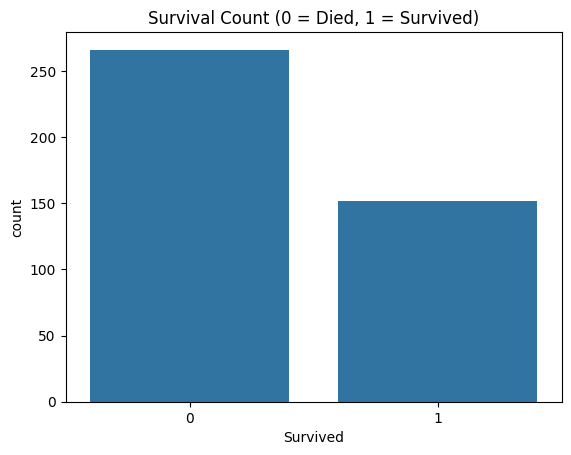

In [14]:
# Show survival counts
sns.countplot(x='Survived', data=df)
plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.show()

In [15]:
# Preprocessing
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\Jayaseelan.m\AppData\Local\Temp\ipykernel_29028\3330911354.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Jayaseelan.m\AppData\Local\Temp\ipykernel_29028\3330911354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].fillna(df['Age'].median(), inplace=True)


In [16]:
# Convert 'Sex' to numerical
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

C:\Users\Jayaseelan.m\AppData\Local\Temp\ipykernel_29028\201892423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = LabelEncoder().fit_transform(df['Sex'])


In [17]:
# Features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Model
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Model Evaluation:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



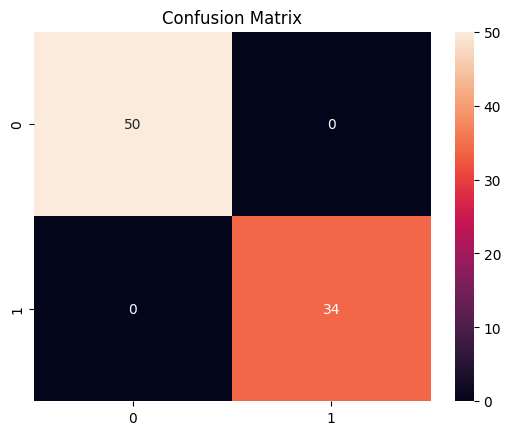

In [20]:
# Accuracy
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()


In [21]:
# Function to predict survival from PassengerId
def predict_by_passenger_id(passenger_id):
    if passenger_id not in df.index:
        return None, None
    passenger = df.loc[[passenger_id]].drop('Survived', axis=1)
    prediction = model.predict(passenger)
    return prediction[0], df.loc[[passenger_id]]

# User input section
print("\n--- Titanic Survival Prediction ---")
print("Enter only Name and PassengerId below to predict:")

try:
    name = input("Name: ")
    passenger_id = int(input("PassengerId: "))

    prediction, passenger_row = predict_by_passenger_id(passenger_id)

    if passenger_row is None:
        print("Passenger not found.")
    else:
        print("\nPassenger Info:")
        print(passenger_row)
        print(f"\nPrediction for {name}: {'Survived' if prediction == 1 else 'Dead'}")
except Exception as e:
    print("Invalid input. Please try again.", e)



--- Titanic Survival Prediction ---
Enter only Name and PassengerId below to predict:
Passenger not found.
